<a href="https://colab.research.google.com/github/carlocaffuzzi/254-Notes/blob/main/Logistic_Regression_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
mydata <- read.csv('https://raw.githubusercontent.com/gitcnk/Data/master/MedSchoolApplicants.csv',
                    stringsAsFactors = TRUE)


In [3]:
names(mydata)
head(mydata)

[1] "Accept"      "Accept_code" "Sex"         "BCPM"        "GPA"        
 [6] "VR"          "PS"          "WS"          "BS"          "MCAT"       
[11] "Apps"

,Accept,Accept_code,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,D,0,F,3.59,3.62,11,9,9,9,38,5
2,A,1,M,3.75,3.84,12,13,8,12,45,3
3,A,1,F,3.24,3.23,9,10,5,9,33,19
4,A,1,F,3.74,3.69,12,11,7,10,40,5
5,A,1,F,3.53,3.38,9,11,4,11,35,11
6,A,1,M,3.59,3.72,10,9,7,10,36,5


## This is the HW for Thursday!  

The goal is to build a model to predict the acceptance to medical school based pn servaral predictors.

The Medical College Admissions Test (MCAT) has four sections:
- Verbal Reasoning (VR)
- Physical Sciences (PS)
- Biological Sciences (BS)
- Writing Sample (WS)

Q1: Explore the distribution of GPA values for Accepted and Denied candidates


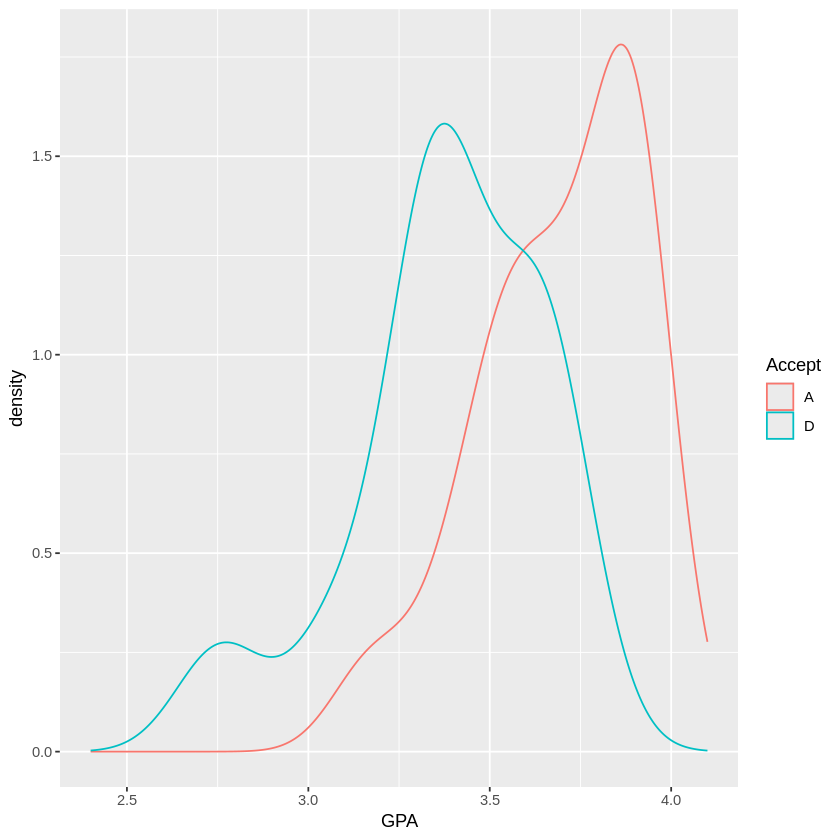

In [4]:
mydata %>%
  ggplot() +
  aes( x = GPA, col = Accept) +
  geom_density() +
  xlim(c(2.4,4.1))

Q2: Explore the distribution of MCAT values for cccepted and denied candidates.





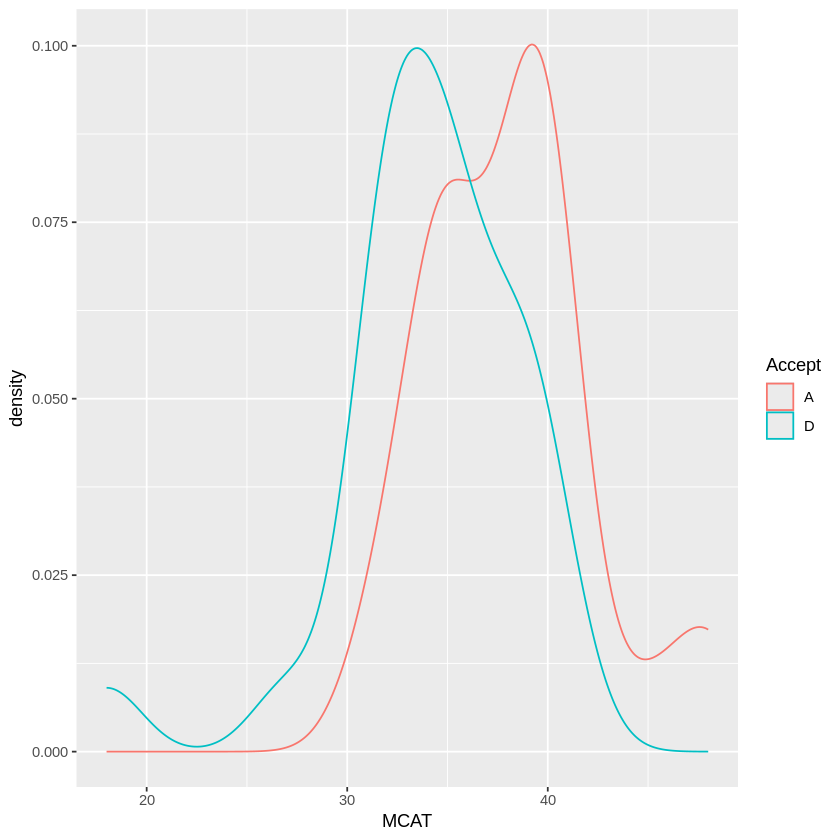

In [5]:
mydata %>%
  ggplot() +
  aes( x = MCAT, col = Accept) +
  geom_density()

Q3: Explore the distribution of number of applications submitted for Accepted and Denied candidates



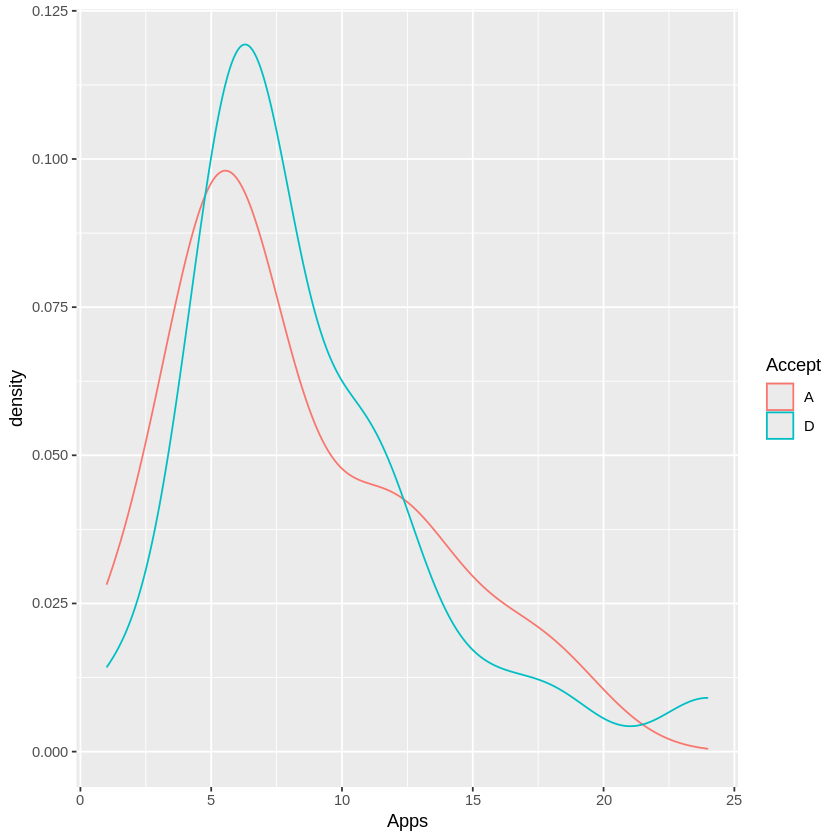

In [6]:
mydata %>%
  ggplot() +
  aes( x = Apps, col = Accept) +
  geom_density()

Q4: Is there a correlation beteween GPA values and MCAT values for Accepted and Denied candidates?  
**Hint:** Use a scatterplot.

Q5: Is this relationship similar(or different) for males and females.  
**Hint:** Use facets.


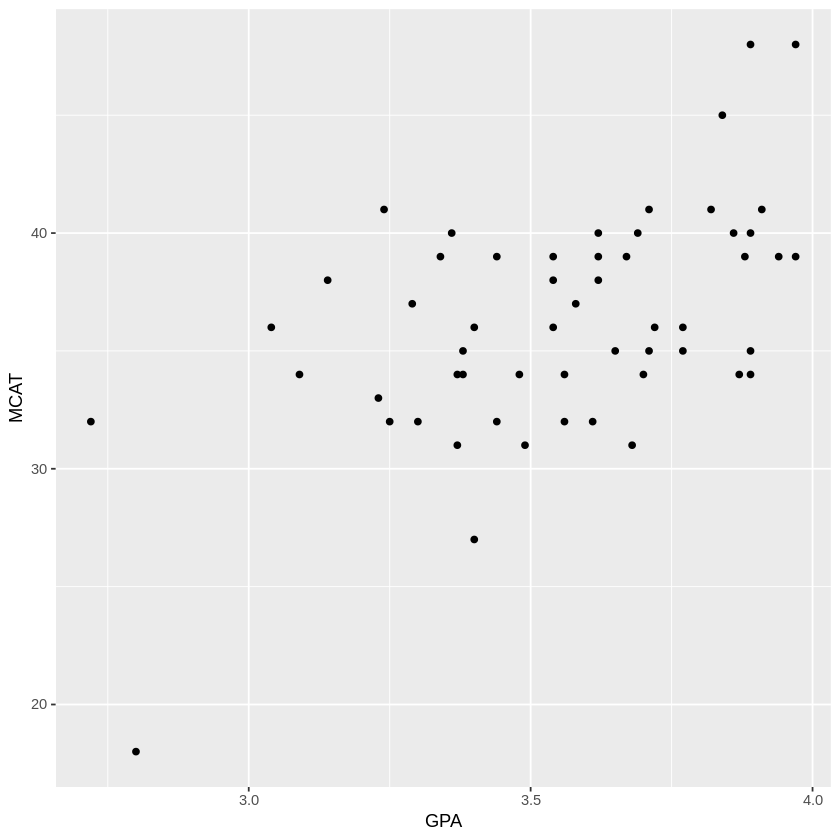

Sex,"cor(GPA, MCAT)"
<fct>,<dbl>
F,0.5097200
M,0.4008728


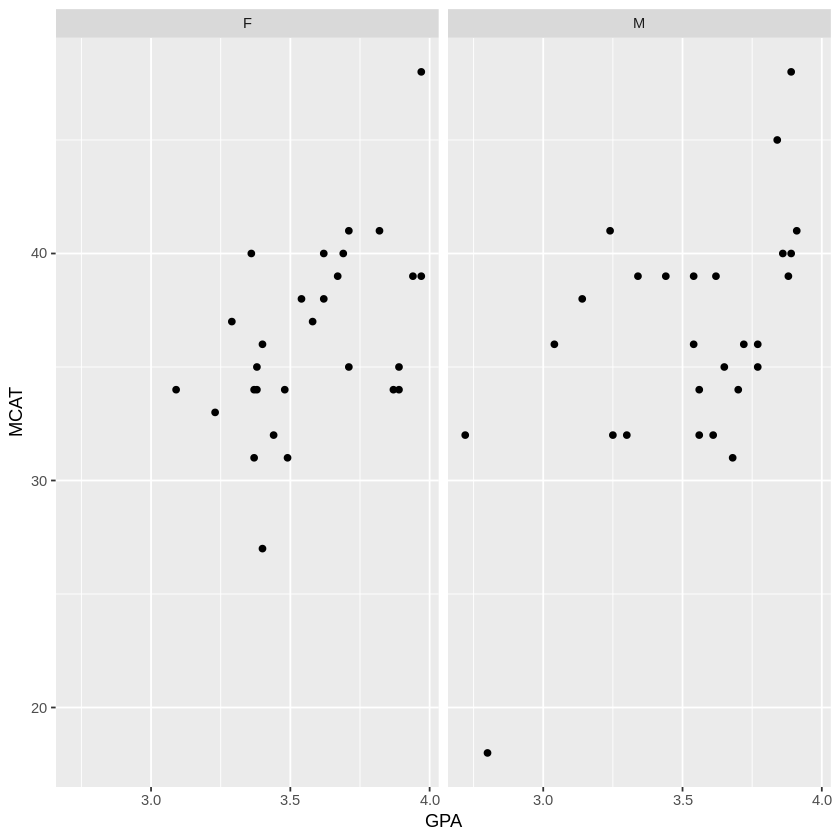

In [7]:
mydata %>%
  ggplot() +
  aes( x = GPA, y = MCAT) +
  geom_point()

mydata %>%
  ggplot() +
  aes( x = GPA, y = MCAT) +
  geom_point() +
  facet_wrap(~Sex)

mydata %>%
  filter(MCAT > 20) %>%
  group_by(Sex) %>%
  summarize(cor(GPA, MCAT))

4. There is a positive correlation between GPA and MCAT scores for all students.
5. The correlation for the men is lower than that of the females.

Q6: Draw a plot to explore the relationship between GPA and acceptance.  Add the logistic regression curve into the plot.

`geom_smooth()` using formula = 'y ~ x'


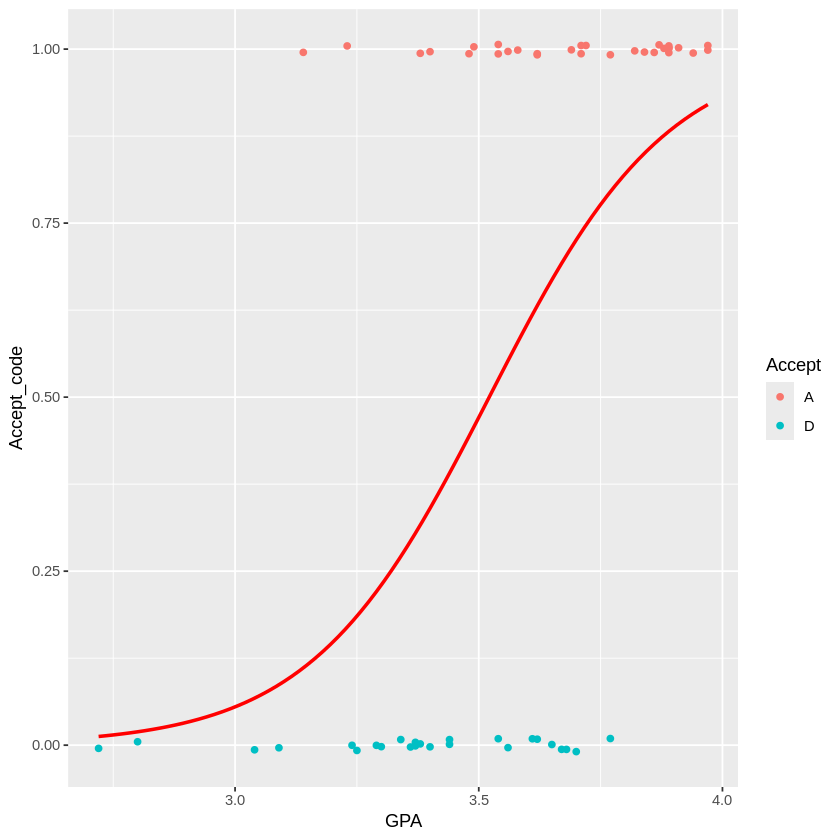

In [8]:
mydata %>%
ggplot() +
  aes(x = GPA, y = Accept_code, col = Accept) +
  geom_jitter(height = 0.01, width = 0) +
  geom_smooth(method = 'glm',
              method.args = list(family = 'binomial'),
              se = FALSE ,
              col = 'red' ,
              fullrange = TRUE)


Q7: Is the probability of acceptance based on GPA is similar(or different) for males and females?

`geom_smooth()` using formula = 'y ~ x'


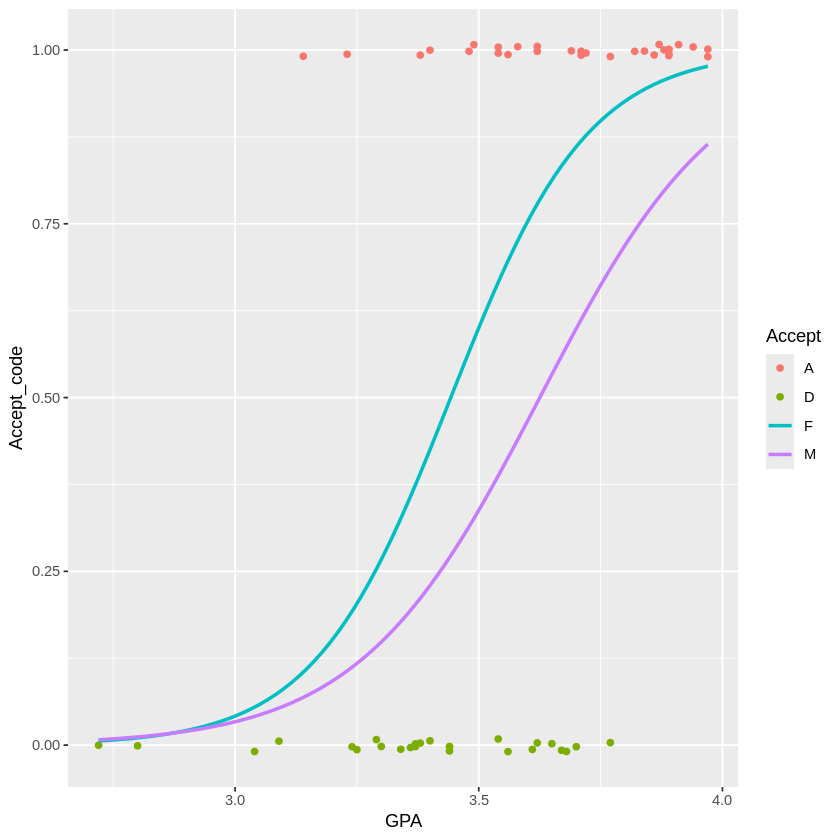

In [9]:
mydata %>%
ggplot() +
  aes(x = GPA, y = Accept_code, col = Accept) +
  geom_jitter(height = 0.01, width = 0) +
  geom_smooth(aes(group = Sex, col = Sex),
              method = 'glm',
              method.args = list(family = 'binomial'),
              se = FALSE,
              fullrange = TRUE)

The probability of acceptance at the same GPA is larger for females at most points. At the maximum difference there looks to be a difference of almost 25% in acceptance chances.

Q8: Use the `glm()` command to fit a logistic model to predict the acceptance probability usinig `GPA` and `Sex` as predictors

In [15]:
model1 <- glm(Accept_code ~ GPA + Sex + GPA*Sex, data = mydata)
model2 <- glm(Accept_code ~ GPA + Sex, data = mydata)

summary(model1)
summary(model2)


Call:
glm(formula = Accept_code ~ GPA + Sex + GPA * Sex, data = mydata)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -3.3680     1.2093  -2.785  0.00749 **
GPA           1.1211     0.3373   3.324  0.00165 **
SexM          0.9423     1.5076   0.625  0.53474   
GPA:SexM     -0.3076     0.4223  -0.728  0.46964   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.1811253)

    Null deviance: 13.6364  on 54  degrees of freedom
Residual deviance:  9.2374  on 51  degrees of freedom
AIC: 67.959

Number of Fisher Scoring iterations: 2



Call:
glm(formula = Accept_code ~ GPA + Sex, data = mydata)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.6659     0.7272  -3.666 0.000579 ***
GPA           0.9249     0.2020   4.578 2.96e-05 ***
SexM         -0.1528     0.1147  -1.332 0.188730    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.1794907)

    Null deviance: 13.6364  on 54  degrees of freedom
Residual deviance:  9.3335  on 52  degrees of freedom
AIC: 66.529

Number of Fisher Scoring iterations: 2


Q9: Write down equations of the two fitted logistic curves.



First Model:
$ \hat p = \frac{e^{−3.3680+1.1211⋅GPA+0.9423⋅SexM−0.3076⋅(GPA⋅SexM)}}{1+e^
{−3.3680+1.1211⋅GPA+0.9423⋅SexM−0.3076⋅(GPA⋅SexM)}}$

Second Model:
$ \hat p = \frac{e^{−2.6659+0.9249⋅GPA-0.1528⋅SexM}}{1+e^
{−2.6659+0.9249⋅GPA-0.1528⋅SexM)}}$

Q10: What is the $R^2$ of your model?  Do you see one in your model output?

R^2 = (13.6364 - 9.2374) / 13.6364 = 0.32